1. ¿Superhéroe o Villano?
Problema: Clasifica si un nuevo personaje es superhéroe o villano usando CART (Gini) e ID3 (Entropía).
Preguntas: ¿Cuál es el mejor atributo para la raíz? ¿Cómo cambia el árbol si añades a "Wonder Woman" (Sí, Sí, Alta, Superhéroe)?


In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [9]:
#Datos
personaje= ['Superman', 'Batman', 'Spiderman', 'Lex Luthor', 'Joker', 'Magneto']
vuela= ['Sí', 'No', 'No', 'No', 'No', 'No']
superpoderes=['Sí', 'No', 'Sí', 'No', 'No', 'Sí']
altura= ['Alta', 'Alta', 'Media', 'Alta', 'Media', 'Media']
clase=['Superhéroe', 'Superhéroe', 'Superhéroe', 'Villano', 'Villano', 'Villano']

#Codificamos las variables categoricas
le_vuela = LabelEncoder()
vuela_c = le_vuela.fit_transform(vuela)
le_superpoderes = LabelEncoder()
superpoderes_c = le_superpoderes.fit_transform(superpoderes)
le_altura = LabelEncoder()
altura_c = le_altura.fit_transform(altura)
le_clase = LabelEncoder()
clase_c = le_clase.fit_transform(clase)


In [15]:
#Generamos datos para el modelo
X = np.array(list(zip(vuela_c, superpoderes_c, altura_c)))
y=clase_c

In [16]:
#Arbol cart utilizando GINI
arbol_gini= DecisionTreeClassifier(criterion='gini',random_state=42)
arbol_gini.fit(X,y)

#Arbol ID3 utilizando entropía
arbol_entropia=DecisionTreeClassifier(criterion='entropy',random_state=42)
arbol_entropia.fit(X,y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

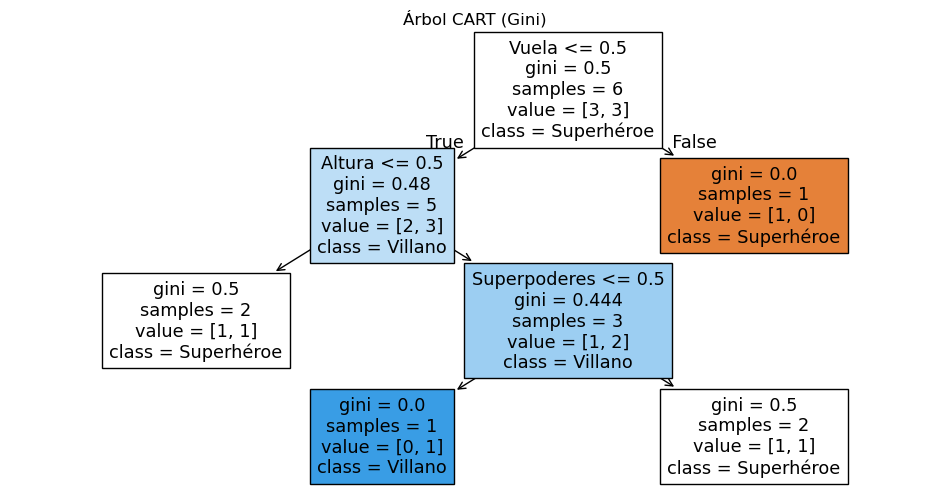

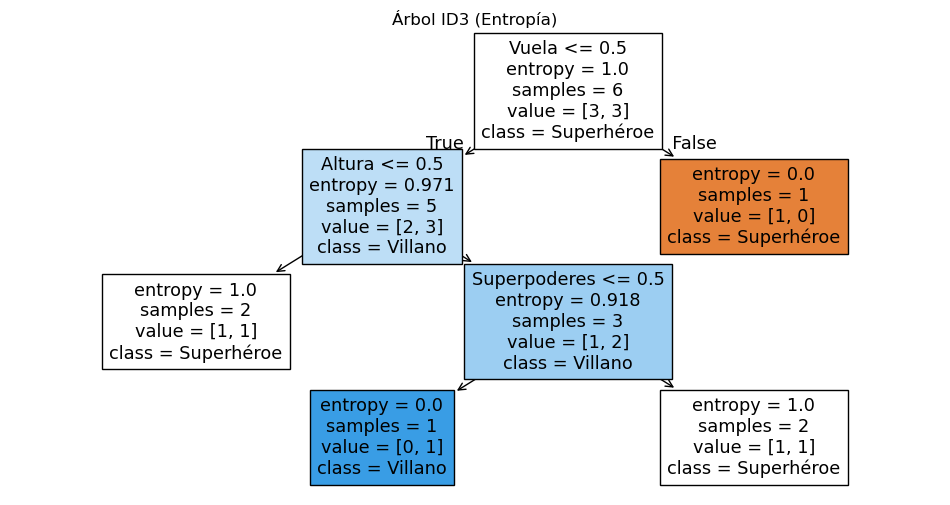

In [17]:
#Visualizar los arboles
plt.figure(figsize=(12, 6))
plot_tree(arbol_gini, feature_names=['Vuela', 'Superpoderes', 'Altura'], 
          class_names=['Superhéroe', 'Villano'], filled=True)
plt.title("Árbol CART (Gini)")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(arbol_entropia, feature_names=['Vuela', 'Superpoderes', 'Altura'], 
          class_names=['Superhéroe', 'Villano'], filled=True)
plt.title("Árbol ID3 (Entropía)")
plt.show()